# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.2
Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

## Resolution:
To tackle this exercise, I recognize that exploring all possible combinations across the options would be too extensive. Therefore, this exercise will be approached step-by-step.

In the first part, I will conduct simulations, keeping the same configuration (activation function, optimizer, loss function) as in exercise `Esercizio_11_1` and will focus on finding the optimal number of layers and neurons per layer.

Once this configuration is established, I will proceed to study the other parameters, holding these values constant. 
Looking at the previous exercise the only parameter I change is the $N_{epoc} = 50$ and $N_{train} = 1000$.


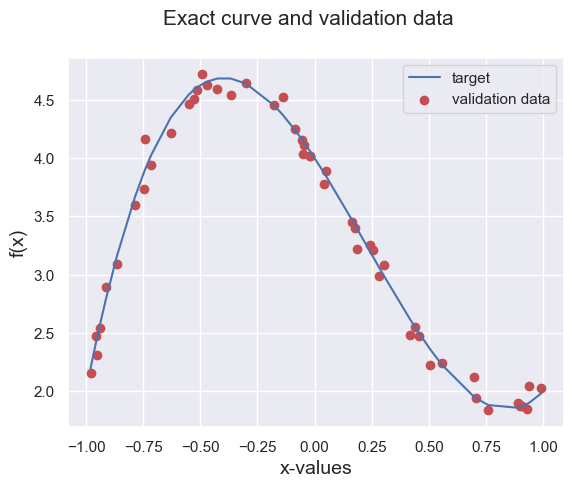

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style = 'darkgrid')

# target parameters of f(x) = 4-3x-2x^2+3x^3
a = 3
b = -2 
c = -3
d = 4

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a * x_valid**3 +b * x_valid**2 + c*x_valid + d #ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train**3 +b * x_train**2 + c*x_train + d, sigma) 
y_valid = np.random.normal(a * x_valid**3 +b * x_valid**2 + c*x_valid + d, sigma)

# plot validation and target dataset

plt.plot(x_valid, y_target, label='target')
plt.suptitle("Exact curve and validation data", fontsize = 15)

plt.xlabel("x-values", fontsize =14)  
plt.ylabel("f(x)", fontsize =14) 

plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Sequential Model NN
model = Sequential([
    Input(shape=(1,)),              
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'), 
    Dense(1)
])


model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# Training of model
history = model.fit(x=x_train, y=y_train, 
                    batch_size=32, epochs=50,
                    shuffle=True, )

weights = model.get_weights()

# SCORE of evalution
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 7.2100 - mse: 7.2100  
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 0.5682 - mse: 0.5682
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.4418 - mse: 0.4418
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.3737 - mse: 0.3737
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.4007 - mse: 0.4007
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 0.3344 - mse: 0.3344
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.3054 - mse: 0.3054
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.2484 - mse: 0.2484
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 0.2777 - mse: 0.2777
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.2437 - mse: 0.2437
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.2694 - mse: 0.2694
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.2182 - mse: 0.2182
Epoch 13/50
32/32 ━━━━━

### Reasearch of Number of Layer and  Number of Neuron in layer:
### 1 Layer:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input

# Number of neurons to test
neurons_options = [1, 5, 10, 20, 30, 50]

# To save loss and accuracy values for each configuration
test_loss_values = []
test_accuracy_values = []

# Model creation, training, and evaluation
for neurons in neurons_options:
    print(f'\nTraining with {neurons} neurons in the layer')
    
    # Define the model
    model = Sequential([
        Input(shape=(1,)),
        Dense(neurons, activation='relu'),
        Dense(1)  # Single output unit
    ])

    # Compile the model with SGD optimizer and MSE loss
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # Train the model
    history = model.fit(
        x=x_train, y=y_train, 
        batch_size=32, epochs=50,
        shuffle=True, 
        validation_data=(x_valid, y_valid), 
        verbose=0  # Set verbose=0 to suppress output
    )

    # Evaluate the model on validation data
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    
    # Save the test loss and accuracy
    test_loss_values.append(score[0])
    test_accuracy_values.append(score[1])




Training with 1 neurons in the layer

Training with 5 neurons in the layer

Training with 10 neurons in the layer

Training with 20 neurons in the layer

Training with 30 neurons in the layer

Training with 50 neurons in the layer


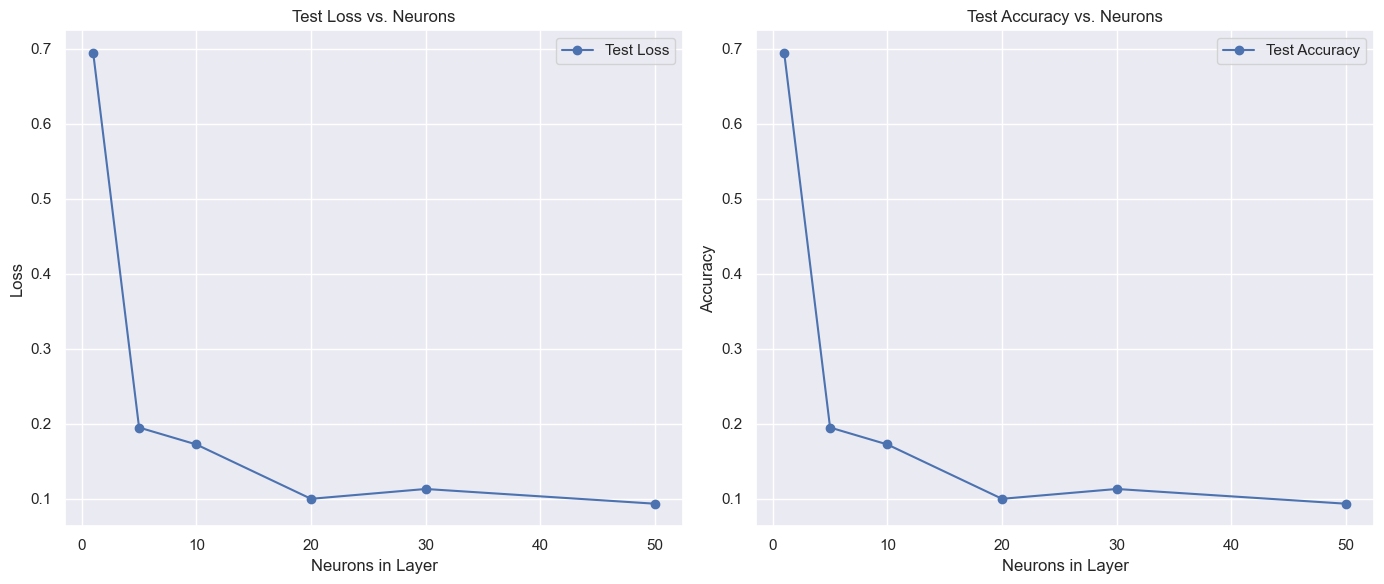

Configuration with 20 neurons: Loss = 0.10007235407829285, Accuracy = 0.10007235407829285


In [14]:
import seaborn as sns
sns.set_theme (style = 'darkgrid')

# Plotting section
plt.figure(figsize=(14, 6))

# Create subplots for loss and accuracy
loss_ax = plt.subplot(1, 2, 1)
accuracy_ax = plt.subplot(1, 2, 2)
loss_ax.set_title('Test Loss vs. Neurons')
loss_ax.set_xlabel('Neurons in Layer')
loss_ax.set_ylabel('Loss')
accuracy_ax.set_title('Test Accuracy vs. Neurons')
accuracy_ax.set_xlabel('Neurons in Layer')
accuracy_ax.set_ylabel('Accuracy')

# Plot the loss and accuracy values
loss_ax.plot(neurons_options, test_loss_values, marker='o', label='Test Loss')
accuracy_ax.plot(neurons_options, test_accuracy_values, marker='o', label='Test Accuracy')

# Configure axis settings and legends
loss_ax.legend()
loss_ax.grid(True)
accuracy_ax.legend()
accuracy_ax.grid(True)

# Show the plot with both subplots
plt.tight_layout()
plt.show()

# Configuration with 20 neurons
neurons_index = neurons_options.index(20) 
best_loss = test_loss_values[neurons_index]
best_accuracy = test_accuracy_values[neurons_index]

# Print results for the configuration with 20 neurons
print(f'Configuration with 20 neurons: Loss = {best_loss}, Accuracy = {best_accuracy}')


In this last graph, it is noted that the best configuration is with 20 neurons. Loss and Accuracy are equal because we use the same loss function and metrics.

### 2 Layers:

The goal is to investigate what happens when adding a layer and to determine which configuration is the best.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input

# Options for the number of neurons in each layer
neurons_options = [1, 5, 10, 20, 35, 50]

# Vectors to save the results
test_loss_values = []
test_accuracy_values = []

# Model creation, training, and evaluation
for neurons1 in neurons_options:
    # Initialize lists to save loss and accuracy values for this configuration
    loss_values = []
    accuracy_values = []

    # Loop over neuron options for the second layer
    for neurons2 in neurons_options:
        print(f'\nTraining with {neurons1} neurons in the first layer and {neurons2} neurons in the second layer')
        
        # Create the model
        model = Sequential([
            Input(shape=(1,)),              
            Dense(neurons1, activation='relu'),
            Dense(neurons2, activation='relu'),
            Dense(1)  # Single output unit
        ])

        # Compile the model
        model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

        # Train the model
        history = model.fit(
            x=x_train, y=y_train, 
            batch_size=32, epochs=50,
            shuffle=True, 
            validation_data=(x_valid, y_valid), 
            verbose=0  # Set verbose=0 to suppress output
        )

        # Evaluate the model on validation data
        score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
        
        # Save the results
        test_loss_values.append(score[0])
        test_accuracy_values.append(score[1])
        
        # Append values for plotting
        loss_values.append(score[0])
        accuracy_values.append(score[1])




Training with 1 neurons in the first layer and 1 neurons in the second layer

Training with 1 neurons in the first layer and 5 neurons in the second layer

Training with 1 neurons in the first layer and 10 neurons in the second layer

Training with 1 neurons in the first layer and 20 neurons in the second layer

Training with 1 neurons in the first layer and 35 neurons in the second layer

Training with 1 neurons in the first layer and 50 neurons in the second layer

Training with 5 neurons in the first layer and 1 neurons in the second layer

Training with 5 neurons in the first layer and 5 neurons in the second layer

Training with 5 neurons in the first layer and 10 neurons in the second layer

Training with 5 neurons in the first layer and 20 neurons in the second layer

Training with 5 neurons in the first layer and 35 neurons in the second layer

Training with 5 neurons in the first layer and 50 neurons in the second layer

Training with 10 neurons in the first layer and 1 neuro

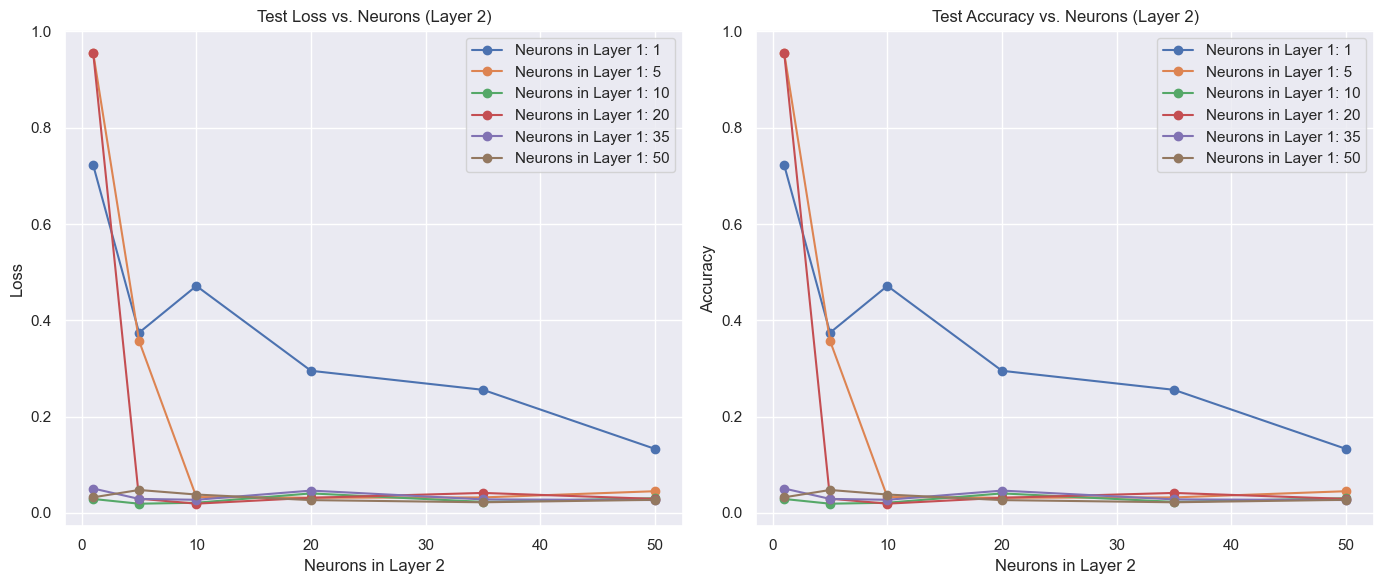

Configuration with 20 neurons in Layer 1 and 10 neurons in Layer 2: Loss = 0.01896665245294571, Accuracy = 0.01896665245294571


In [19]:
sns.set_theme (style = 'darkgrid')
# Plotting Section
plt.figure(figsize=(14, 6))

# Create subplots for Loss and Accuracy
loss_ax = plt.subplot(1, 2, 1)
accuracy_ax = plt.subplot(1, 2, 2)

# Set titles and labels for the subplots
loss_ax.set_title('Test Loss vs. Neurons (Layer 2)')
loss_ax.set_xlabel('Neurons in Layer 2')
loss_ax.set_ylabel('Loss')
accuracy_ax.set_title('Test Accuracy vs. Neurons (Layer 2)')
accuracy_ax.set_xlabel('Neurons in Layer 2')
accuracy_ax.set_ylabel('Accuracy')

# Plot the loss and accuracy for each configuration of neurons in Layer 1
for i, neurons1 in enumerate(neurons_options):
    # Slice the corresponding values for each layer configuration
    loss_values = test_loss_values[i * len(neurons_options):(i + 1) * len(neurons_options)]
    accuracy_values = test_accuracy_values[i * len(neurons_options):(i + 1) * len(neurons_options)]

    # Update the Loss plot
    loss_ax.plot(neurons_options, loss_values, marker='o', label=f'Neurons in Layer 1: {neurons1}')
    loss_ax.legend()
    loss_ax.grid(True)

    # Update the Accuracy plot
    accuracy_ax.plot(neurons_options, accuracy_values, marker='o', label=f'Neurons in Layer 1: {neurons1}')
    accuracy_ax.legend()
    accuracy_ax.grid(True)

# Show the final plot
plt.tight_layout()
plt.show()

# Extract and print results for a configuration with 20 neurons in each layer
neurons1 = 20  # Neurons in the first layer
neurons2 = 10  # Neurons in the second layer

# Calculate the index for the desired neuron configuration
index = neurons_options.index(neurons1) * len(neurons_options) + neurons_options.index(neurons2)

# Retrieve corresponding results
best_loss = test_loss_values[index]
best_accuracy = test_accuracy_values[index]

# Print the results for the chosen configuration
print(f'Configuration with {neurons1} neurons in Layer 1 and {neurons2} neurons in Layer 2: Loss = {best_loss}, Accuracy = {best_accuracy}')


In this graph, two aspects can be observed: first, the test loss and accuracy are the same since the same metrics and loss function are used. 

Secondly, the combination of having a first layer with 20 neurons and a second layer with 10 neurons is found to be the best combination.

Subsequently, the next step is to verify what happens when we keep 20 neurons fixed in the first and 10 in the second layers and then add a third layer, varying it between 1, 5, and 10 neurons. This will help determine whether a new minimum is found or if the situation remains mostly unchanged.




### 3 Layer:


In [21]:
# Options for the number of neurons in the third layer
neurons_options = [1, 5, 10]

# Vectors to save results
test_loss_values_third_layer = []
test_accuracy_values_third_layer = []
val_loss_values_third_layer = []  # List for validation loss
val_accuracy_values_third_layer = []  # List for validation accuracy (currently unused)

# Fix the number of neurons in the first two layers
neurons1 = 20
neurons2 = 10

# Loop over neurons for the third layer
for neurons3 in neurons_options:
    print(f'\nTraining with {neurons1} neurons in the first layer, {neurons2} neurons in the second layer, and {neurons3} neurons in the third layer')
    
    # Create the model
    model = Sequential([
        Input(shape=(1,)),              
        Dense(neurons1, activation='relu'),
        Dense(neurons2, activation='relu'),
        Dense(neurons3, activation='relu'),  # Variable third layer
        Dense(1)  # Single output unit
    ])

    # Compile the model
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

    # Train the model
    history = model.fit(
        x=x_train, y=y_train, 
        batch_size=32, epochs=50,
        shuffle=True, 
        validation_data=(x_valid, y_valid), 
        verbose=0  # Set verbose=0 to suppress output
    )

    # Evaluate the model on the validation set
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    
    # Save test results
    test_loss_values_third_layer.append(score[0])
    test_accuracy_values_third_layer.append(score[1])

    # Save validation loss and accuracy from the training history
    val_loss_values_third_layer.append(min(history.history['val_loss']))  # Store the minimum validation loss





Training with 20 neurons in the first layer, 10 neurons in the second layer, and 1 neurons in the third layer

Training with 20 neurons in the first layer, 10 neurons in the second layer, and 5 neurons in the third layer

Training with 20 neurons in the first layer, 10 neurons in the second layer, and 10 neurons in the third layer


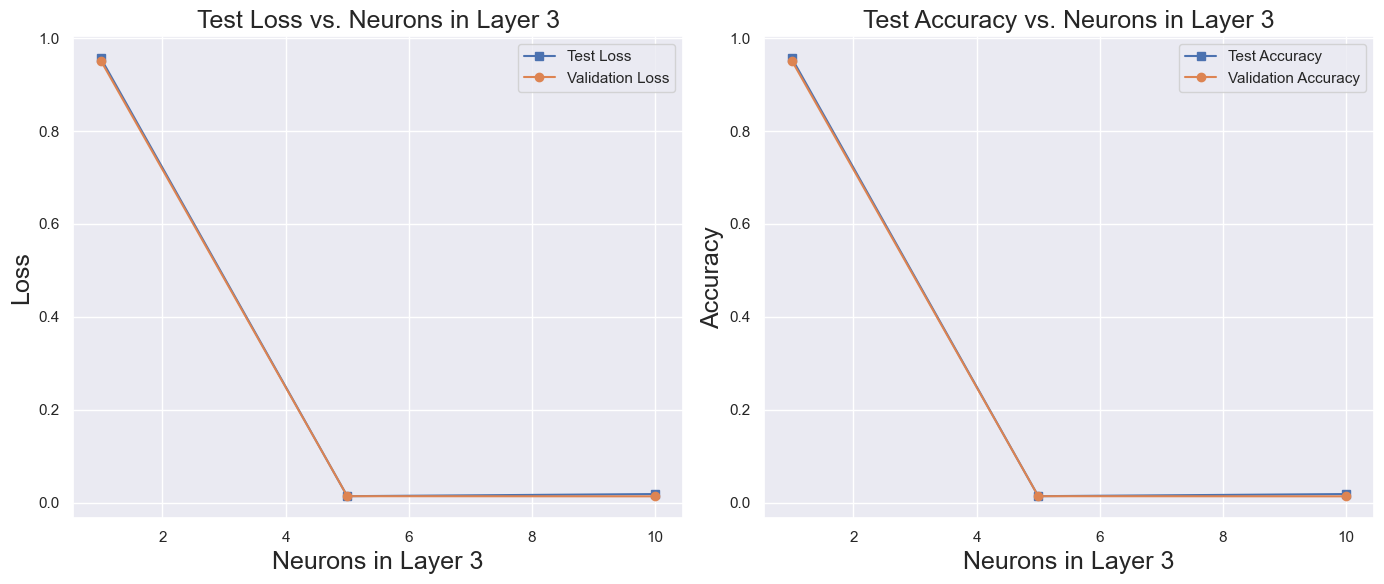


Test Loss values for third layer: [0.9566369652748108, 0.014311516657471657, 0.018878581002354622]
Validation Loss values for third layer: [0.9514715075492859, 0.014311516657471657, 0.013954968191683292]
Test Accuracy values for third layer: [0.9566369652748108, 0.014311516657471657, 0.018878581002354622]
Validation Accuracy values for third layer: [0.9514715075492859, 0.014311516657471657, 0.013954968191683292]


In [26]:
# Create the figure for plotting
plt.figure(figsize=(14, 6))

# Create subplots for Loss and Accuracy
loss_ax = plt.subplot(1, 2, 1)
accuracy_ax = plt.subplot(1, 2, 2)

# Set titles and labels for the subplots
loss_ax.set_title('Test Loss vs. Neurons in Layer 3',fontsize =18)
loss_ax.set_xlabel('Neurons in Layer 3',fontsize =18)
loss_ax.set_ylabel('Loss',fontsize =18)
accuracy_ax.set_title('Test Accuracy vs. Neurons in Layer 3',fontsize =18)
accuracy_ax.set_xlabel('Neurons in Layer 3',fontsize =18)
accuracy_ax.set_ylabel('Accuracy',fontsize =18)

# Plotting the results

# Add test and validation loss values to the Loss plot
loss_ax.plot(neurons_options, test_loss_values_third_layer, marker='s', label='Test Loss')
loss_ax.plot(neurons_options, val_loss_values_third_layer, marker='o', label='Validation Loss')  # Include validation loss

# Add test accuracy values to the Accuracy plot
accuracy_ax.plot(neurons_options, test_accuracy_values_third_layer, marker='s', label='Test Accuracy')
accuracy_ax.plot(neurons_options,val_loss_values_third_layer, marker='o', label='Validation Accuracy')  # Include validation accuracy (if needed)

# Add legends and grids for clarity
loss_ax.legend()
loss_ax.grid(True)
accuracy_ax.legend()
accuracy_ax.grid(True)

# Show the final plot
plt.tight_layout()
plt.show()

# Print final results for comparison
print('\nTest Loss values for third layer:', test_loss_values_third_layer)
print('Validation Loss values for third layer:', val_loss_values_third_layer)
print('Test Accuracy values for third layer:', test_accuracy_values_third_layer)
print('Validation Accuracy values for third layer:', val_loss_values_third_layer)

The results are very similar to each other, but to avoid the problem of overfitting, even though the `val_loss` and the `loss` function coincide, it is preferred to use one layers of 20 neurons and the second one of 10.


### Change Other Parameters:

From now on, two layers of 20 and 10 neurons each will be maintained. The next step will be to vary the optimization methods, loss functions, and activation functions in order to determine which combination is the best, while continuously measuring the loss function and accuracy. Moving forward, I will start changing the parameters in order and, by comparing the tests, I will evaluate which is the best and use it for prediction.

### Fixing two optimizer (SGD, Adam) and changing loss and activate function:
For this study I will utilized as loss the classic **MSE (Mean Squared Error)** , the **MAE (Mean Absolute Error)** and **Huber Loss** which is a combination of MSE and MAE. Instead as activate function it is used, the standard **ReLu** and **tanh**.
Here there are two small description of the two optimizer utilized:
### SGD (Stochastic Gradient Descent)
Stochastic Gradient Descent (SGD) is an optimization algorithm that unlike traditional gradient descent, which computes the gradient of the loss function using the entire dataset, SGD updates model weights using only a random sample (or mini-batch) of data at each iteration. This approach speeds up computations and makes the algorithm more scalable.

While SGD can converge faster and escape local minima due to its stochastic nature, it may produce noisier updates, requiring careful tuning of the learning rate.

### Adam:
Adam (Adaptive Moment Estimation) is an adaptive learning rate optimization algorithm designed to efficiently handle large datasets and parameters.
Adam computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients. This makes it particularly effective for problems with noisy data or sparse gradients, providing robust performance across various tasks.



Training with optimizer: sgd, loss: mean_squared_error, activation: relu
Optimizer: SGD, Loss: mean_squared_error, Activation: relu -> Loss: 0.03352384269237518, Accuracy: 0.03352384269237518


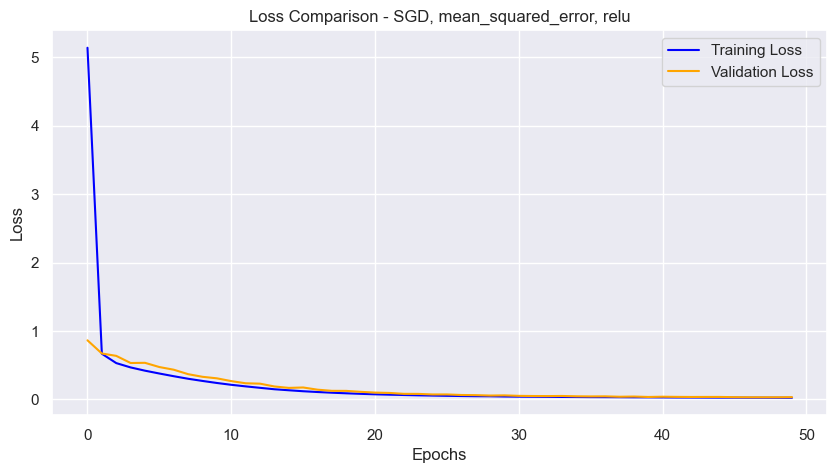


Training with optimizer: sgd, loss: mean_squared_error, activation: tanh
Optimizer: SGD, Loss: mean_squared_error, Activation: tanh -> Loss: 0.04809422791004181, Accuracy: 0.04809422791004181


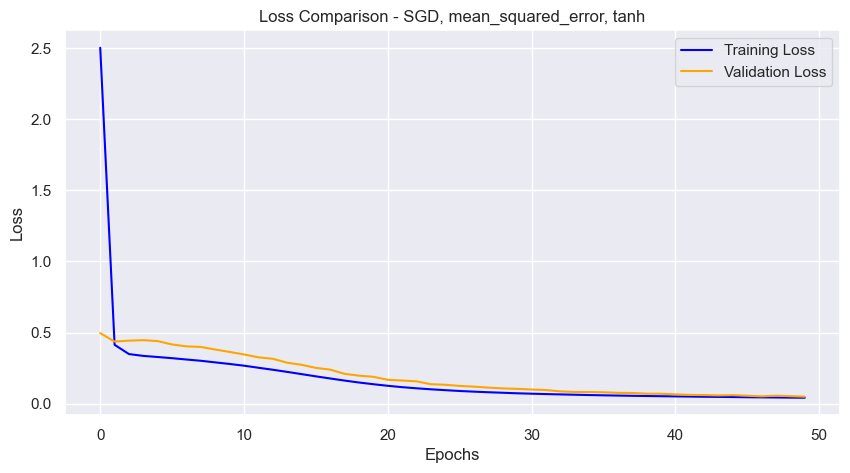


Training with optimizer: sgd, loss: mean_absolute_error, activation: relu
Optimizer: SGD, Loss: mean_absolute_error, Activation: relu -> Loss: 0.10333075374364853, Accuracy: 0.020809579640626907


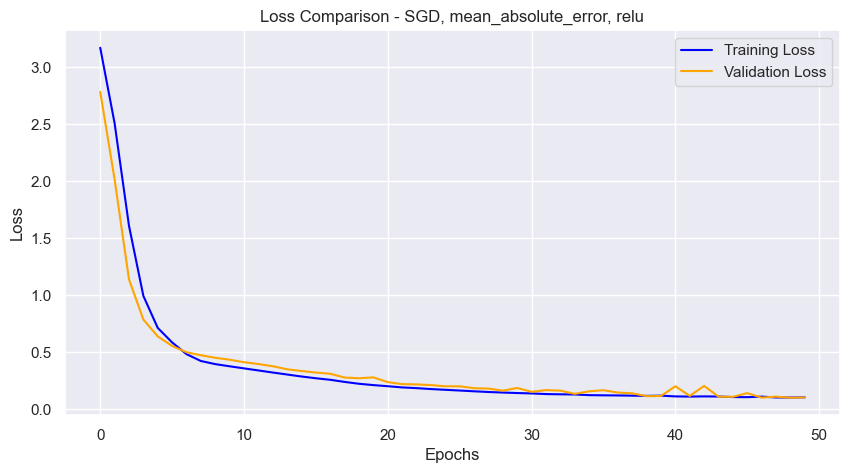


Training with optimizer: sgd, loss: mean_absolute_error, activation: tanh
Optimizer: SGD, Loss: mean_absolute_error, Activation: tanh -> Loss: 0.1606893539428711, Accuracy: 0.05682126432657242


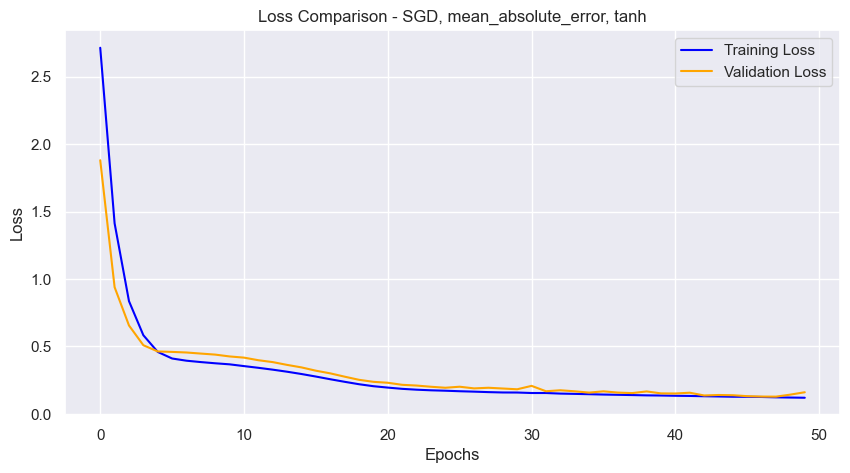


Training with optimizer: adam, loss: mean_squared_error, activation: relu
Optimizer: Adam, Loss: mean_squared_error, Activation: relu -> Loss: 0.024301279336214066, Accuracy: 0.024301279336214066


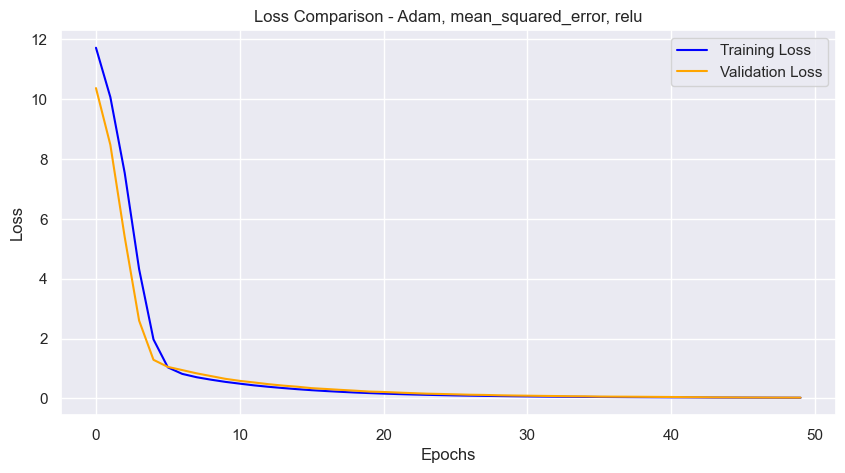


Training with optimizer: adam, loss: mean_squared_error, activation: tanh
Optimizer: Adam, Loss: mean_squared_error, Activation: tanh -> Loss: 0.07369030267000198, Accuracy: 0.07369030267000198


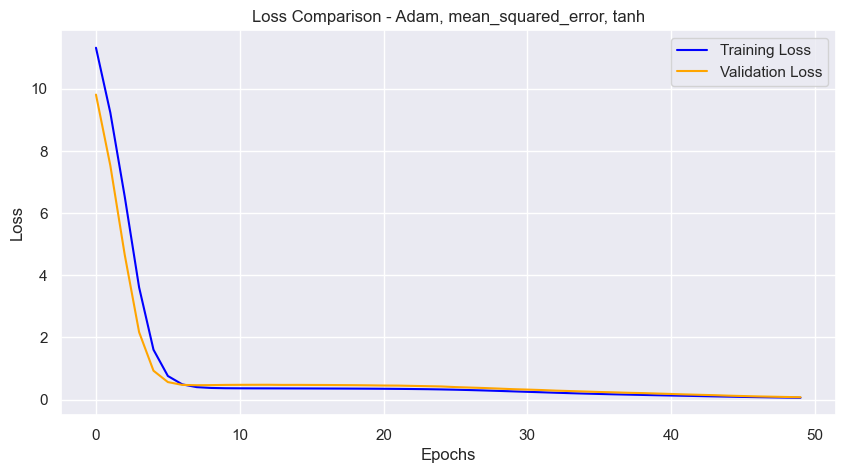


Training with optimizer: adam, loss: mean_absolute_error, activation: relu
Optimizer: Adam, Loss: mean_absolute_error, Activation: relu -> Loss: 0.08337932825088501, Accuracy: 0.011501503176987171


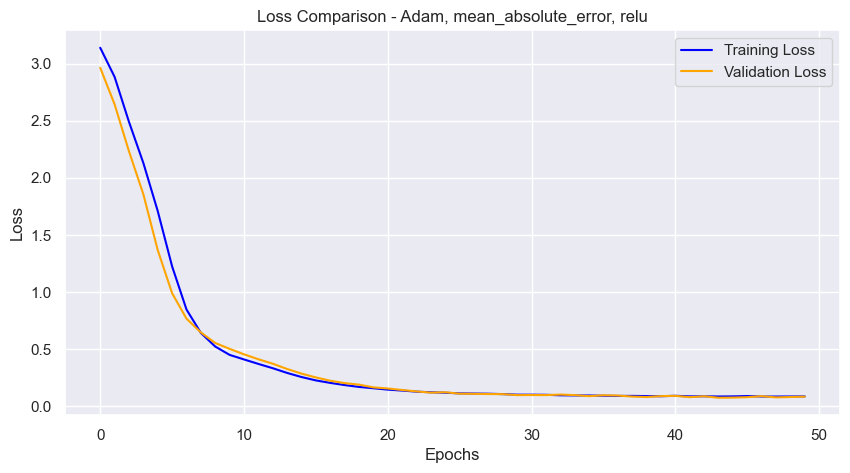


Training with optimizer: adam, loss: mean_absolute_error, activation: tanh
Optimizer: Adam, Loss: mean_absolute_error, Activation: tanh -> Loss: 0.0878206267952919, Accuracy: 0.014084035530686378


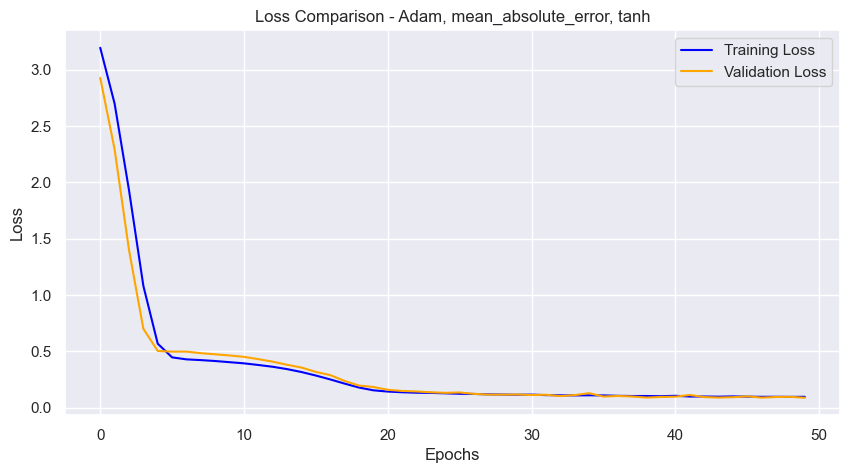

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Input
sns.set_theme(style='darkgrid')

# Set the fixed number of neurons in the first two layers
neurons1 = 20  # Neurons in the first layer
neurons2 = 10  # Neurons in the second layer

# Options for activation functions and loss functions
activation_functions = ['relu', 'tanh']
loss_functions = ['mean_squared_error', 'mean_absolute_error']

# Lists to store results for each optimizer
results_sgd = []
results_adam = []

# Function to create and train the model
def create_and_train_model(optimizer, loss, activation):
    print(f'\nTraining with optimizer: {optimizer}, loss: {loss}, activation: {activation}')
    
    # Create the model with specified layers
    model = Sequential([
        Input(shape=(1,)),              # Input layer with one feature
        Dense(neurons1, activation=activation),  # First hidden layer
        Dense(neurons2, activation=activation),  # Second hidden layer
        Dense(1)  # Output layer with a single neuron (regression task)
    ])

    # Compile the model with the specified optimizer and loss function
    model.compile(optimizer=optimizer, loss=loss, metrics=['mse'])

    # Train the model using the training data
    history = model.fit(x=x_train, y=y_train, 
                        batch_size=32, epochs=50,
                        shuffle=True, 
                        validation_data=(x_valid, y_valid), 
                        verbose=0)  # Set verbose=0 to silence the output

    # Evaluate the model on the validation set
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
    
    # Return the evaluation score and the training history
    return score, history

# Function to print and plot the results
def print_results(score, history, optimizer, loss, activation):
    # Print the evaluation score (loss and accuracy)
    print(f'Optimizer: {optimizer}, Loss: {loss}, Activation: {activation} -> Loss: {score[0]}, Accuracy: {score[1]}')
    
    # Create a plot for the loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')  # Training loss
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')  # Validation loss
    plt.title(f'Loss Comparison - {optimizer}, {loss}, {activation}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test with SGD optimizer
for loss in loss_functions:
    for activation in activation_functions:
        # Train the model with each combination of loss and activation function for SGD optimizer
        score, history = create_and_train_model('sgd', loss, activation)
        results_sgd.append((loss, activation, score))  # Store the results for SGD
        print_results(score, history, 'SGD', loss, activation)  # Print and plot the results

# Test with Adam optimizer
for loss in loss_functions:
    for activation in activation_functions:
        # Train the model with each combination of loss and activation function for Adam optimizer
        score, history = create_and_train_model('adam', loss, activation)
        results_adam.append((loss, activation, score))  # Store the results for Adam
        print_results(score, history, 'Adam', loss, activation)  # Print and plot the results


By comparing the obtained data, we consider those with the best test loss and accuracy. Among the various combinations studied, the best one appears to be:

- `optimizer = adam`
- `loss = MSE`
- `activation function = ReLU`

Below, I present a complete analysis with these parameters along with the corresponding predictions for the data with a single input and two hidden layer made by 20 and 10 neurons.

## Final Analysis:

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Definisci il modello sequenziale
model = Sequential([
    Input(shape=(1,)),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1)            
])

# Compila il modello scegliendo l'ottimizzatore, la funzione di perdita e le metriche
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Stampa un riepilogo del modello per verificare
model.summary()

Model: "sequential_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_334 (Dense)               │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_335 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_336 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.2864 - mse: 12.2864 - val_loss: 10.5859 - val_mse: 10.5859
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - loss: 10.7322 - mse: 10.7322 - val_loss: 9.0015 - val_mse: 9.0015
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 9.0448 - mse: 9.0448 - val_loss: 6.6858 - val_mse: 6.6858
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 6.4256 - mse: 6.4256 - val_loss: 4.0003 - val_mse: 4.0003
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 3.5571 - mse: 3.5571 - val_loss: 1.8736 - val_mse: 1.8736
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 1.6467 - mse: 1.6467 - val_loss: 1.1117 - val_mse: 1.1117
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.9826 - mse: 0.9826 - val_loss: 0.9682 - val_mse: 0.9682
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 0.7771 - mse: 0.7771 - val_loss: 0.8303 - val_mse: 0.8303
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step 

In [31]:
# return weights and biases
model.get_weights()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 - mse: 0.0144  

Test loss: 0.013551909476518631
Test accuracy: 0.013551909476518631
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - mse: 0.0039  

Test loss: 0.003511649090796709
Test accuracy: 0.003511649090796709


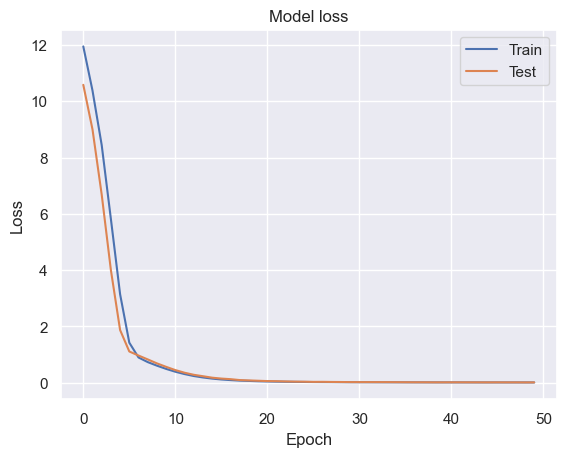

In [32]:
# look into training history
# Plot training & validation loss values
sns.set_theme(style= 'darkgrid')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Test'], loc='best')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step


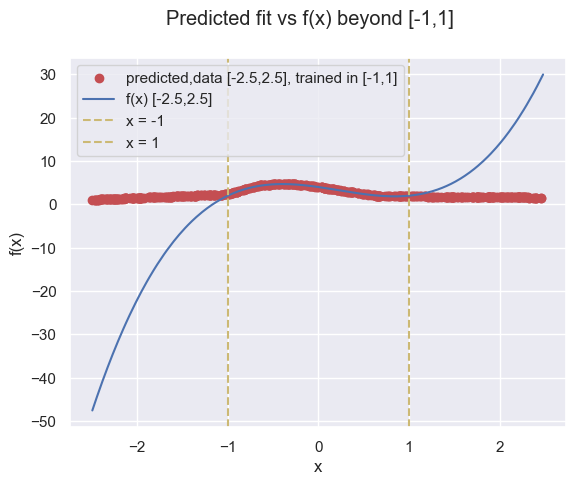

In [47]:
# Set the theme for the plot
sns.set_theme(style='darkgrid')

x_valid = np.random.uniform(-2.5, 2.5, 500)
x_valid.sort()
y_target = a * x_valid**3 +b * x_valid**2 + c*x_valid + d #ideal (target) linear function

# Example data for prediction
x_predicted = np.random.uniform(-2.5, 2.5, 500)
y_predicted = model.predict(x_predicted)

# Plot the scatter and line
plt.scatter(x_predicted, y_predicted, color='r', label="predicted,data [-2.5,2.5], trained in [-1,1]")  # Predicted data points
plt.plot(x_valid, y_target, label="f(x) [-2.5,2.5]")  # Actual target data

# Add dashed vertical lines at x = -1 and x = 1
plt.axvline(x=-1, color='y', linestyle='--', label="x = -1")
plt.axvline(x=1, color='y', linestyle='--', label="x = 1")

# Label the axes
plt.xlabel('x')
plt.ylabel('f(x)')
plt.suptitle('Predicted fit vs f(x) beyond [-1,1]')

# Display the grid and the legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


### Observation and Discussion:

In this last plot, it can be observed that the predicted data align well with the function $ f(x) $ within the range $[-1, 1]$, but they become completely incompatible for values outside this range. This behavior is due to the fact that the model was trained only on data within the range $[-1, 1]$, and thus, it has not learned to generalize beyond this interval. Consequently, for values of $ x $ outside this range, the model's predictions deviate significantly from the expected values, as it has not been exposed to such inputs during training. This limitation highlights the importance of training on a diverse and representative range of data for better generalization.
